<a href="https://colab.research.google.com/github/kecosz/EcohNet/blob/main/rELA0_43_tutorial_080723.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preparation
### Mounting Google Drive

In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
addres

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### rpy2 version specification
Required to successfully execute "%load_ext rpy2.ipython" as of 2023/1

In [ ]:
!pip install rpy2==3.5.1
#!pip install --upgrade ipykernel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp310-cp310-linux_x86_64.whl size=314932 sha256=31c1e88215ceee58741ec19dafe2d004219638f1b271320f4a1e7c021123e9a0
  Stored in directory: /root/.cache/pip/wheels/73/a6/ff/4e75dd1ce1cfa2b9a670cbccf6a1e41c553199e9b25f05d953
Successfully built rpy2
  Attempting uninstall: rpy2
    Found existing installation: rpy2 3.4.2
    Uninstalling rpy2-3.4.2:
      Successfully uninstalled rpy2-3.4.2


In [ ]:
%load_ext rpy2.ipython

### Installing packages

In [ ]:
# This Python code is just for not showing rpy2 messages related to R package installation on google colab
from rpy2.rinterface_lib.callbacks import logger as rpy2_logger
import logging
rpy2_logger.setLevel(logging.ERROR)   # will display errors, but not warnings

In [ ]:
%%R
install.packages("Rcpp")
install.packages("RcppArmadillo")
install.packages("doParallel")
install.packages('tidyverse')
install.packages('gsubfn')
install.packages('zoo')
install.packages('plyr')
install.packages('gtools')
install.packages('ggsci')
install.packages('igraph')
install.packages('tidygraph')
install.packages('RColorBrewer')
install.packages("stringdist")
#install.packages('scatterpie') <- Commented out because of an error.
library("Rcpp")
library("RcppArmadillo")
library("doParallel")
library('tidyverse')
library('gsubfn')
library('zoo')
library('plyr')
library('gtools')
library('ggsci')
library('igraph')
library('tidygraph')
library('RColorBrewer')
library("stringdist")
#library('scatterpie')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::accumulate() masks foreach::accumulate()
✖ dplyr::filter()     masks stats::filter()
✖ dplyr::lag()        masks stats::lag()
✖ purrr::when()       masks foreach::when()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


### Download and install rELA package

In [ ]:
!rm -r rELA
!git clone https://github.com/kecosz/rELA.git

rm: cannot remove 'rELA': No such file or directory
Cloning into 'rELA'...
remote: Enumerating objects: 159, done.
remote: Counting objects: 100% (89/89), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 159 (delta 29), reused 47 (delta 14), pack-reused 70
Receiving objects: 100% (159/159), 4.45 MiB | 12.35 MiB/s, done.
Resolving deltas: 100% (54/54), done.


In [ ]:
%%R
install.packages("rELA/rELA.v0.43.tar.gz")
library("rELA")

## Energy Landscape Analysis

### Download data

In [ ]:
%%R
# Specify the path for your own data in the code below, if necessary.
baseabtable <- read.csv('rELA/data/abundance_table.csv', sep=',', fileEncoding='utf-8') %>%
  column_to_rownames(., var = "X")
basemetadata <- read.csv('rELA/data/sample_metadata.csv', sep=',', fileEncoding='utf-8') %>%
  column_to_rownames(., var = "X")


In [ ]:
%%R
head(basemetadata, 7)

         factor.1   factor.2
sample.1    -0.92 2.79692115
sample.2     0.34 2.14701252
sample.3    -0.92 1.60611363
sample.4    -0.24 0.58476465
sample.5     0.40 1.73161379
sample.6    -0.82 2.95971753
sample.7     0.36 0.07787331


In [ ]:
%%R
# To group species with the same presence/absence pattern into one group,
#set grouping to 1 and specify a number between 0 and 1 for grouping_th.
# If 0, only species with the same presence/absence pattern will be grouped together.
list[ocmat, abmat, enmat, samplelabel, specieslabel, factorlabel] <-
  Formatting(baseabtable, basemetadata, normalizeq=1, parameters=c(0.01, 0.01, 0.99), grouping=1, grouping_th=0.)

Processed 256 samples.
Relative abundance threshold = 0.01 
Occurrence threshold (lower) = 0.01 
Occurrence threshold (upper) = 0.99 
0  groups were found.
Selected  16  out of  16 species.


### Parameter fitting

In [ ]:
%%R
#runSA: ocmatrix, env (environmental parameters; with>SA / without>fullSA), qth (threshold for stopping computation), rep (number of fitting processes to compute mean parameter value), threads (number of parallel threads)

sa <- runSA(ocmat=as.matrix(ocmat), qth=10^-5, rep=128, threads=2)


Start parameter fitting:
SA: elapsed time 85.81 sec



In [ ]:
%%R
list[he,je,ge,hge] <- sa2params(sa)

In [ ]:
%%R
he

 species.12  species.16   species.7   species.5   species.2  species.10 
-1.83857238 -1.53099647 -1.42442347 -1.59303527 -1.21121357 -1.41343379 
  species.8  species.11  species.15   species.6   species.4  species.14 
 0.23798455 -2.63639862 -1.72068194 -0.03004601  1.52731028  0.83458990 
  species.3  species.13   species.1   species.9 
 0.83180721  0.01319025  2.30919848  2.38800122 


In [ ]:
%%R
hge

 species.12  species.16   species.7   species.5   species.2  species.10 
-1.83857238 -1.53099647 -1.42442347 -1.59303527 -1.21121357 -1.41343379 
  species.8  species.11  species.15   species.6   species.4  species.14 
 0.23798455 -2.63639862 -1.72068194 -0.03004601  1.52731028  0.83458990 
  species.3  species.13   species.1   species.9 
 0.83180721  0.01319025  2.30919848  2.38800122 


### Analysis and visualization of energy landscape
#### ELA function

In [ ]:
%%R
elanp <- ELA(sa, env=NULL,
                SS.itr=20000, FindingTip.itr=10000, # <- the number of steps for finding stable states and tipping points (basically no need to change)
                threads=2, reporting=TRUE)

Start ELA:
4 stable states were found.
Checking 6 tipping points.
converting...
ELA: elapsed time 2.44 sec


In [ ]:
%%R
ela <- ELPruning(elanp, th=0.05, threads=2)

Start pruning:
*...
ELPruning: elapsed time 4.45 sec


In [ ]:
%%R
list[stablestates, stablen, tippingpoints, tippingen] <- ela[[1]]

Stable states

In [ ]:
%%R
stablestates

[1] "09x" "EWB" "1uV"


Convert an integer representing a stable state (ssid) to a binary vector

In [ ]:
%%R
# ssid -> binary vector
bin = as.list(lapply(stablestates, function(x){id2bin(x, ncol(ocmat))}))
names(bin) <- stablestates
bin

$`09x`
 [1] 0 0 0 0 0 0 1 0 0 1 1 1 1 0 1 1

$EWB
 [1] 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1

$`1uV`
 [1] 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 1



Convert a binary vector to a ssid

In [ ]:
%%R
# binary vector -> ssid
as.vector(sapply(bin, bin2id))

[1] "09x" "EWB" "1uV"


Table of SSID, Energy, Community composition

In [ ]:
%%R
 colnames(ocmat)

 [1] "species.12" "species.16" "species.7"  "species.5"  "species.2" 
 [6] "species.10" "species.8"  "species.11" "species.15" "species.6" 
[11] "species.4"  "species.14" "species.3"  "species.13" "species.1" 
[16] "species.9" 


In [ ]:
%%R
sstable <- as.data.frame(cbind(stablestates, stablen, t(as.data.frame(bin)))) %>%
  'colnames<-'(c('ID', 'Energy', colnames(ocmat))) %>%
  'rownames<-'(1: length(stablestates))
sstable

   ID       Energy species.12 species.16 species.7 species.5 species.2
1 09x -12.62695177          0          0         0         0         0
2 EWB -10.63245179          1          1         1         0         1
3 1uV  -9.26148196          0          0         0         1         1
  species.10 species.8 species.11 species.15 species.6 species.4 species.14
1          0         1          0          0         1         1          1
2          0         0          0          0         0         0          0
3          1         1          0          0         0         0          1
  species.3 species.13 species.1 species.9
1         1          0         1         1
2         1          0         1         1
3         1          1         1         1


Export the table to Google Drive in CSV format

In [ ]:
%%R
write.csv(x = sstable, file="drive/MyDrive/colab_export/sstable.csv") # "sstable.csv" is saved in "colab_export" folder of your Google Drive.

ID and energy of tipping points

In [ ]:
%%R
as.data.frame(tippingpoints)

   X1  X2  X3
1 Inf 4eB 0uV
2 Inf Inf 4eB
3 Inf Inf Inf


In [ ]:
%%R
as.data.frame(tippingen)

   X1        X2        X3
1 Inf -7.278518 -8.784127
2 Inf       Inf -7.278518
3 Inf       Inf       Inf


Energy of any community composition


In [ ]:
%%R
cEnergy(ocmat[1,], he, je)

[1] -4.227905


Find the stable state for a community composition

In [ ]:
%%R
Bi(ocmat[1,], he, je)

[[1]]
[1] "01t"

[[2]]
[1] -11.70072



### Principal component analysis  
Observed community compositions plotted on a PC1,2 plane and color-coded by their stable states

NULL


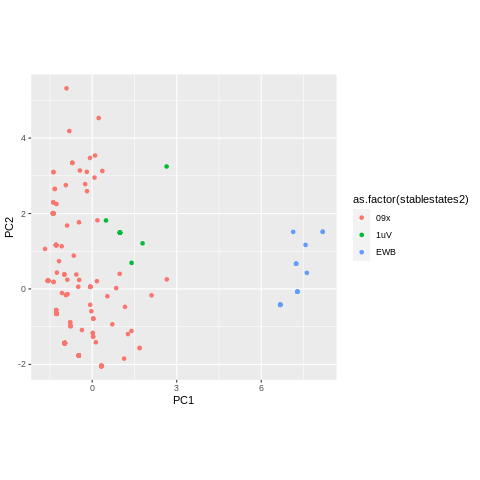

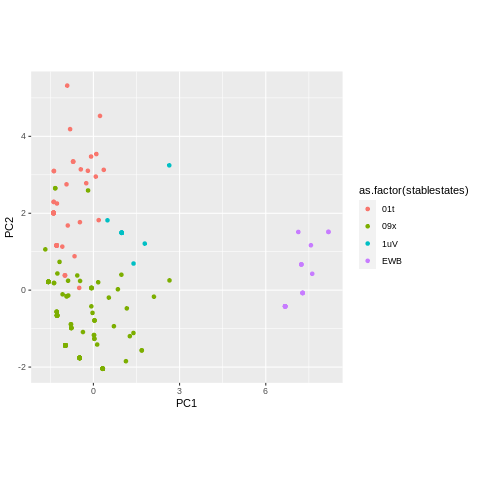

In [ ]:
%%R
PCplot(ocmat, sa, ssrep=ela[[2]])
PCplot(ocmat, sa, ssrep=ela[[2]], pruned=FALSE)

Disconnectivity graph


NULL


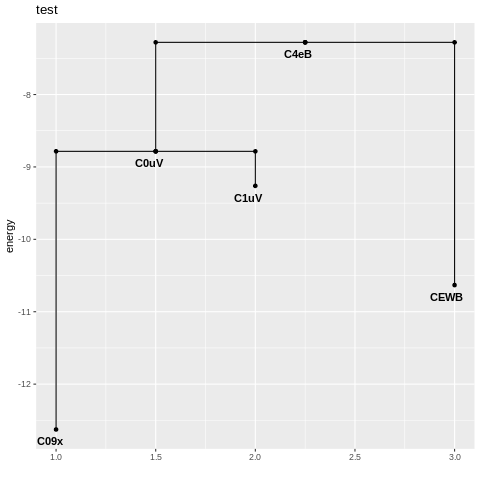

In [ ]:
%%R
showDG(ela[[1]], ocmat, "test")

### Visualization of species' interaction

NULL


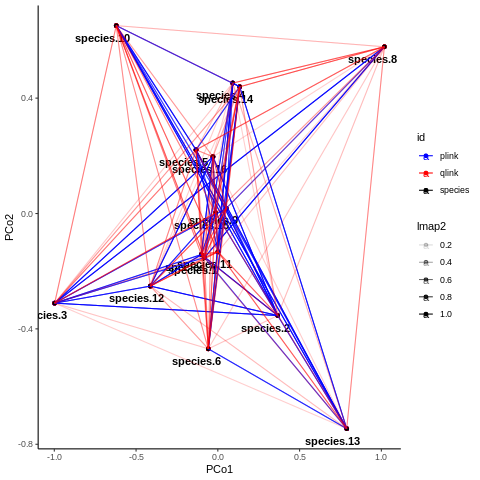

In [ ]:
%%R
showIntrGraph(ela[[1]], sa, th=0.01, # <- Threshold for links to be displayed
              annot_adj=c(0.75, 2.00))

### Energy landscape analysis with environmental gradients

In [ ]:
%%R
baseabtable <- read.csv('rELA/data/abundance_table.csv', sep=',', fileEncoding='utf-8') %>%
  column_to_rownames(., var = "X")
basemetadata <- read.csv('rELA/data/sample_metadata.csv', sep=',', fileEncoding='utf-8') %>%
  column_to_rownames(., var = "X")

In [ ]:
%%R
list[ocmat, abmat, enmat, samplelabel, specieslabel, factorlabel] <-
  Formatting(baseabtable, basemetadata, 1, c(0.01, 0.01, 0.99), 1, 0)

Processed 256 samples.
Relative abundance threshold = 0.01 
Occurrence threshold (lower) = 0.01 
Occurrence threshold (upper) = 0.99 
0  groups were found.
Selected  16  out of  16 species.


In [ ]:
# Parameter fitting including environmental parameters
%%R
sa <- runSA(ocmat=as.matrix(ocmat), enmat=as.matrix(enmat), qth=10^-5, rep=256, threads=2)

Start parameter fitting
SA: elapsed time 195.08 sec



In [ ]:
%%R
gela <- GradELA(sa=sa, eid="factor.1", # Specify the label or position of an environmental factor
  enmat=enmat, env=NULL, range=NULL, steps=32, th=0.05, threads=8) #[[1]]: return value of ELA function for each step, [[2]]: value of environmental factor for each step, [[3]]: specified environmental factor

env not specified, the mean of enmat is used
processing(32) |================================|
Elapsed time 38.97 sec


NULL


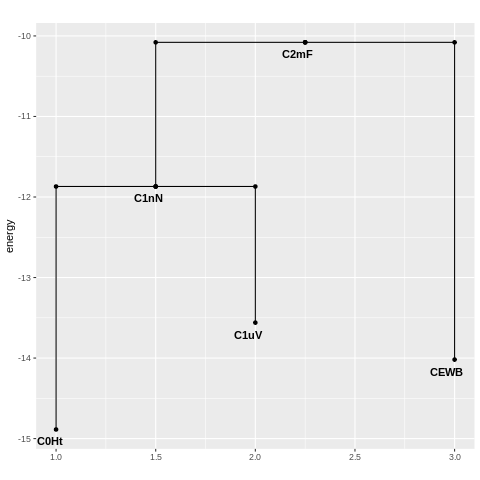

In [ ]:
# Disconnectivity graph
%%R
showDG(gela[[1]][[1]][[1]], ocmat)

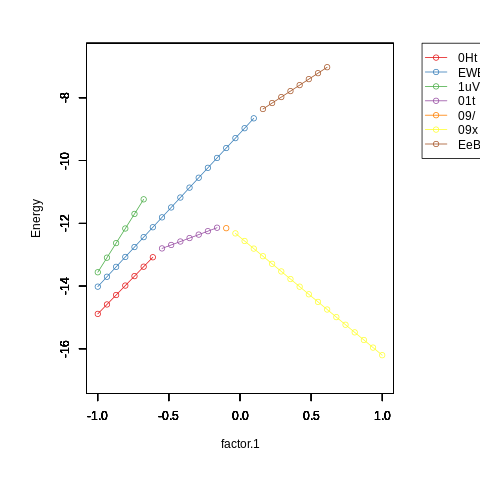

In [ ]:
# Stable state diagram
%%R
showSSD(gela)

## Stability

In [ ]:
%%R
stb <- Stability(sa, ocmat, enmat=NULL, threads=2)
head(stb, 5)

Start Stability:
sa obtained with enmat, but enmat is not given.
assigned a zero vector as the environmental condition for all data points.
convTime may be too small, try convTime>10000.
Stability: elapsed time 6.33 sec

           energy.gap ss.entropy  e.realize  e.stable state.id stable.state.id
sample.1    9.8583716  0.1414405  -3.160181 -13.01855      07/             09x
sample.10   1.1363640  0.0000000 -11.882189 -13.01855      08/             09x
sample.100  6.2644852  0.1943919  -6.754067 -13.01855      1uF             09x
sample.101  0.4114918  0.1183500 -12.607061 -13.01855      09t             09x
sample.102  0.7301739  0.6098403 -12.288379 -13.01855      01t             09x


In [ ]:
%%R
stbwe <- Stability(sa, ocmat, enmat=enmat, threads=2)
head(stbwe, 5)

Start Stability:
Stability: elapsed time 34.94 sec

           energy.gap ss.entropy  e.realize  e.stable state.id stable.state.id
sample.1    7.5203245  1.3075731  -6.462844 -13.98317      07/             0Ht
sample.10   1.8782057  0.0000000 -11.900997 -13.77920      08/             09x
sample.100  1.3836718  1.2485307 -12.630267 -14.01394      1uF             1uV
sample.101  0.4286001  0.4364698 -11.499485 -11.92809      09t             01t
sample.102  0.0000000  1.0724747 -12.939908 -12.93991      01t             01t


gStability returns a list of 2 elements: the dataframe for pruned/non-pruned energy landscape, respectively. In addition to the dataframe of Stability it includes e.tipping (energy of tipping point) and energy.barrier (height of energy from observed state to the tipping point).

In [ ]:
%%R
gstb <- gStability(sa, ocmat, enmat=NULL, threads=8)

Start gStability:
sa obtained with enmat, but enmat is not given.
assigned a zero vector as the environmental condition for all data points.
gStability: elapsed time 39.18 sec



In [ ]:
%%R
gstb[[1]][1:8,]

           energy.gap ss.entropy energy.barrier  e.realize   e.stable e.tipping
sample.1    9.8583715 0.00000000       5.097991  -3.160181 -13.018553 -7.920562
sample.10   1.1363640 0.13578841       5.097991 -11.882189 -13.018553 -7.920562
sample.100  6.2644852 0.00000000       5.097991  -6.754067 -13.018553 -7.920562
sample.101  0.4114918 0.11236071       5.097991 -12.607061 -13.018553 -7.920562
sample.102  0.7301739 0.00000000       5.097991 -12.288379 -13.018553 -7.920562
sample.103  2.2002398 0.02946405       5.097991 -10.818313 -13.018553 -7.920562
sample.104  0.2476000 0.00000000       5.097991 -12.770953 -13.018553 -7.920562
sample.105  4.2951315 0.09377791       1.719187  -5.344617  -9.639748 -7.920562
           state.id stable.state.id
sample.1        07/             09x
sample.10       08/             09x
sample.100      1uF             09x
sample.101      09t             09x
sample.102      01t             09x
sample.103      0Ht             09x
sample.104      09/         

In [ ]:
%%R
gstb[[2]][1:8,]

           energy.gap.np ss.entropy.np energy.barrier.np  e.realize e.stable.np
sample.1       9.8583716    0.23615438          5.097991  -3.160181  -13.018553
sample.10      1.1363640    0.62387169          5.097991 -11.882189  -13.018553
sample.100     6.2644852    0.30352094          5.097991  -6.754067  -13.018553
sample.101     0.4114918    0.00000000          5.097991 -12.607061  -13.018553
sample.102     0.7301739    0.00000000          5.097991 -12.288379  -13.018553
sample.103     2.2002398    0.83126970          5.097991 -10.818313  -13.018553
sample.104     0.2476000    0.00000000          5.097991 -12.770953  -13.018553
sample.105     4.2951315    0.06722154          1.719187  -5.344617   -9.639748
           e.tipping.np state.id.np stable.state.id.np
sample.1      -7.920562         07/                09x
sample.10     -7.920562         08/                09x
sample.100    -7.920562         1uF                09x
sample.101    -7.920562         09t                09x
sampl

In [ ]:
%%R
gstbe <- gStability(sa, ocmat, enmat=enmat, threads=8)

Start gStability:
gStability: elapsed time 172.82 sec



In [ ]:
%%R
gstbe[[1]][1:8,]

              energy.gap ss.entropy energy.barrier  e.realize   e.stable
sample.1    7.520324e+00  0.9196507       3.230716  -6.462844 -13.983168
sample.10   1.878206e+00  0.0000000       6.449198 -11.900997 -13.779203
sample.100  1.383672e+00  0.9558956       1.963700 -12.630267 -14.013938
sample.101  4.286001e-01  0.6622595       6.324566 -11.499485 -11.928085
sample.102 -1.140705e-09  0.8141447       2.461314 -12.939908 -12.939908
sample.103 -2.327834e-09  1.2613116       2.532820 -13.710307 -13.710307
sample.104  6.013236e-01  0.0000000       5.418485 -12.018360 -12.619684
sample.105  2.315975e+00  0.5264795       1.562920  -6.588827  -8.904803
            e.tipping state.id stable.state.id
sample.1   -10.752452      07/             0Ht
sample.10   -7.330005      08/             09x
sample.100 -12.050239      1uF             1uV
sample.101  -5.603519      09t             01t
sample.102 -10.478594      01t             01t
sample.103 -11.177488      0Ht             0Ht
sample.104  -7

In [ ]:
%%R
gstbe[[2]][1:8,]

           energy.gap.np ss.entropy.np energy.barrier.np  e.realize e.stable.np
sample.1       7.5203245     1.3303327          3.230716  -6.462844  -13.983168
sample.10      1.8782057     0.0000000          6.449198 -11.900997  -13.779203
sample.100     1.3836718     1.4039660          1.963700 -12.630267  -14.013938
sample.101     0.4286001     0.4721575          6.324566 -11.499485  -11.928085
sample.102     0.0000000     0.2422922          2.461314 -12.939908  -12.939908
sample.103     0.0000000     0.9475382          2.532820 -13.710307  -13.710307
sample.104     0.6013236     0.0000000          5.418485 -12.018360  -12.619684
sample.105     2.3159754     0.5088991          1.562920  -6.588827   -8.904803
           e.tipping.np state.id.np stable.state.id.np
sample.1     -10.752452         07/                0Ht
sample.10     -7.330005         08/                09x
sample.100   -12.050239         1uF                1uV
sample.101    -5.603519         09t                01t
sampl